In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import r2_score  #importing the required libraries

##PREPROCESSING OF THE DATA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UMV_BATTERY/battery/data_SoC/full_data_1.csv") #importing the dataset

In [ ]:
df = df.drop(['sr_no','ambient_temp','speed','battery_level','charging_cycle'],axis = 1) #droping the unneccesary columns

In [ ]:
t_0 = df['time'][0]

In [ ]:
l = df.index.to_list()

In [ ]:
for i in range(len(df)):
  if(df['time'][i] == 0):   #droping the unccesary rows in the dataset
    df = df.drop(i)

In [ ]:
df.head(30)

,inclination,weight,battery temperature,time,Battery_rating,acceleration,battery_current,battery_voltage,humidity
0,-6.24,4.27,23.92,9245,10000,-0.19,0.00,12.00,0.0
1,-6.24,4.27,23.92,9245,10000,-0.19,0.00,12.00,0.0
2,-4.54,11.11,24.66,18152,10000,-0.20,0.00,12.00,0.0
3,-4.96,-0.58,24.94,19694,10000,-0.20,0.00,12.00,0.0
4,-4.40,-3.05,24.20,27465,10000,-0.19,0.00,12.00,0.0
5,-5.41,5.96,22.56,29364,10000,-0.21,0.00,12.00,0.0
6,-5.41,5.96,22.56,29364,10000,-0.21,0.00,12.00,0.0
7,-5.41,5.96,22.56,29364,10000,-0.21,0.00,12.00,0.0
13,12.53,325.13,22.19,75071,10000,-0.11,0.00,12.00,0.0
14,4.27,519.71,21.92,78810,10000,-0.10,0.00,12.00,0.0


In [ ]:
df = df.drop((df.loc[df.battery_voltage < 6]).index.to_list()) #droping the unneccesary rows in the dataset

In [ ]:
l = df.index.to_list()  #to correct the data of time
l_store = []
t = t_0
t_prev = df.time.copy(deep = True)
for i in range(1,len(l)):
  if((t_prev[l[i]] - t_prev[l[i-1]])<0):
    t = df.time[l[i-1]]
    df['time'][l[i]] = df['time'][l[i-1]]+df['time'][l[i]]
  elif(df.time[l[i]] == df.time[l[i-1]]):
    l_store += [i]
  else:
    df['time'][l[i]] = t_prev[l[i]]+t

<ipython-input-294-321f50387566>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'][l[i]] = t_prev[l[i]]+t
<ipython-input-294-321f50387566>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'][l[i]] = df['time'][l[i-1]]+df['time'][l[i]]


In [ ]:
l = df.index.to_list()
for i in range(len(l_store)):
  l_store[i] = l[l_store[i]]
df = df.drop(l_store)  #droping the duplicate rows

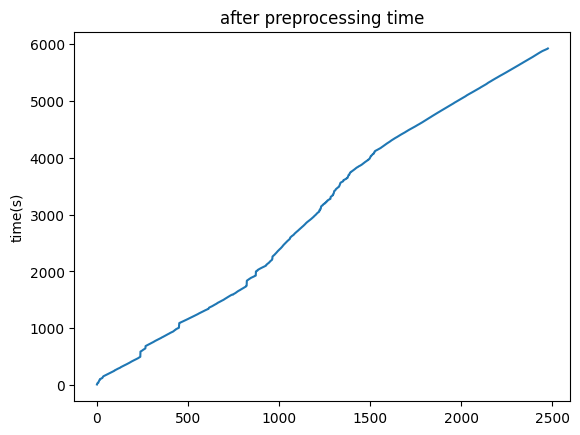

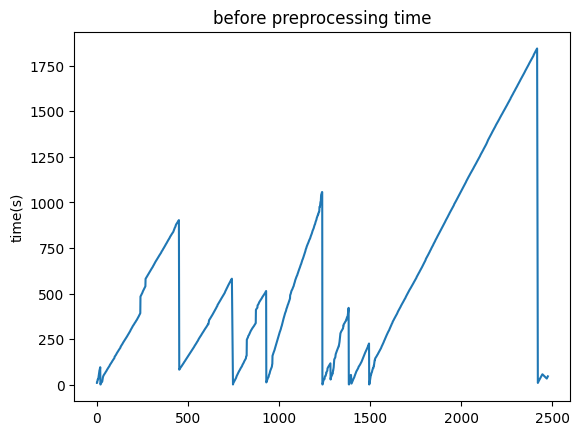

In [ ]:
plt.plot(df.time/1000)
plt.ylabel('time(s)')
plt.title('after preprocessing time')
plt.show()
plt.plot(t_prev/1000)
plt.ylabel('time(s)')
plt.title('before preprocessing time')
plt.show()

In [ ]:
df.time /= 1000

##COLOUMB COUNTING


In [ ]:
df1 = df.copy(deep = True)

In [ ]:
df['q'] = 0

In [ ]:
l = df.index.to_list() #estimating the total charge drawn from the battery during a time interval
t_prev = df.time[0]
for i in range(1,len(l)):
  df.q[l[i]] = df.time[l[i]]-t_prev
  df.q[l[i]] *= df.battery_current[l[i]]
  t_prev = df.time[l[i]]

<ipython-input-300-96f7b29842dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.q[l[i]] = df.time[l[i]]-t_prev


In [ ]:
df['cum_q'] = 0  #estimating the total charge drawn from the battery till a time
l = df.index.to_list()
for i in range(len(l)):
  df.cum_q[l[i]] = sum(df.q[:i])

<ipython-input-301-f8a1437e9933>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cum_q[l[i]] = sum(df.q[:i])


In [ ]:
df.head(30)

,inclination,weight,battery temperature,time,Battery_rating,acceleration,battery_current,battery_voltage,humidity,q,cum_q
0,-6.24,4.27,23.92,9.245,10000,-0.19,0.00,12.00,0.0,0.00000,0.00000
2,-4.54,11.11,24.66,27.397,10000,-0.20,0.00,12.00,0.0,0.00000,0.00000
3,-4.96,-0.58,24.94,28.939,10000,-0.20,0.00,12.00,0.0,0.00000,0.00000
4,-4.40,-3.05,24.20,36.710,10000,-0.19,0.00,12.00,0.0,0.00000,0.00000
5,-5.41,5.96,22.56,38.609,10000,-0.21,0.00,12.00,0.0,0.00000,0.00000
6,-5.41,5.96,22.56,38.609,10000,-0.21,0.00,12.00,0.0,0.00000,0.00000
7,-5.41,5.96,22.56,38.609,10000,-0.21,0.00,12.00,0.0,0.00000,0.00000
13,12.53,325.13,22.19,84.316,10000,-0.11,0.00,12.00,0.0,0.00000,0.00000
14,4.27,519.71,21.92,88.055,10000,-0.10,0.00,12.00,0.0,0.00000,0.00000
15,-2.79,511.77,24.47,90.504,10000,-0.08,0.00,12.00,0.0,0.00000,0.00000


In [ ]:
df['soc1'] = 100  #Estimating the SOC using coloumb counting method
l = df.index.to_list()
for i in range(len(l)):
  df.soc1[l[i]] = 100-0.9*df.cum_q[l[i]]/sum(df.q)*100

<ipython-input-303-00c2c1225e73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.soc1[l[i]] = 100-0.9*df.cum_q[l[i]]/sum(df.q)*100


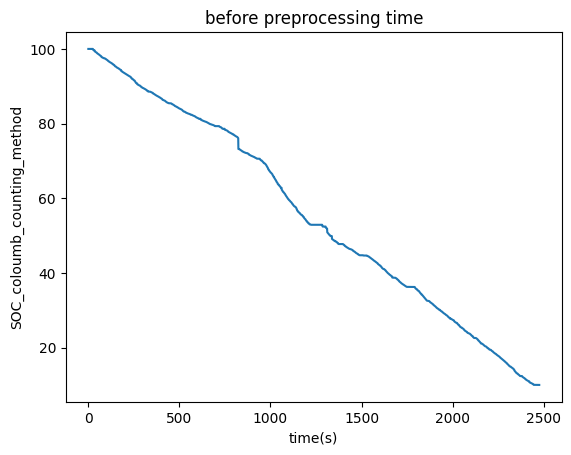

In [ ]:
plt.plot(df.soc1)
plt.ylabel('SOC_coloumb_counting_method')
plt.xlabel('time(s)')
plt.title('before preprocessing time')
plt.show()

##OCV

In [ ]:
df_ocv = pd.DataFrame()
df_ocv['cap'] = df['soc1']  #creating the dataframe for polynomial regression

In [ ]:
df_ocv['ocv'] = df["battery_current"]*0.6470588235294+df["battery_voltage"] #estimating the open circuit voltage

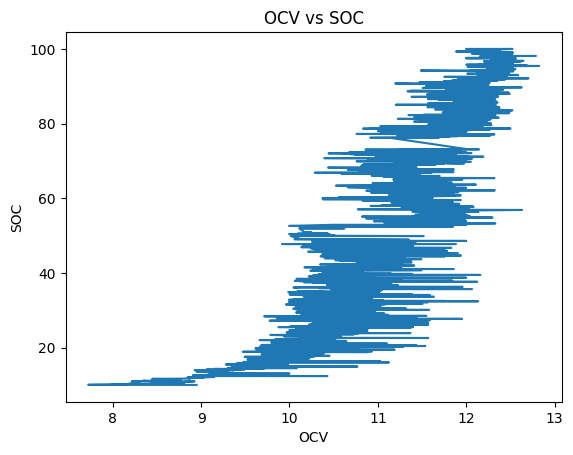

In [ ]:
plt.plot(df_ocv['ocv'],df_ocv['cap'])
plt.title('OCV vs SOC')
plt.xlabel('OCV')
plt.ylabel('SOC')
plt.show()

In [ ]:
df_ocv = df_ocv.sort_values(by = ['cap'])  #preprocessing the data regrading SOC , to eliminate duplicate entries

In [ ]:
df_ocv.head()

,cap,ocv
2476,10.0,8.95
2470,10.0,8.83
2471,10.0,8.87
2475,10.0,8.75
2473,10.0,8.67


In [ ]:
mavg = pd.DataFrame()
mavg['ocv'] = df_ocv['ocv']
mavg['.6'] = 8.95

In [ ]:
mavg = mavg.reset_index()

In [ ]:
mavg.head(30)

,index,ocv,.6
0,2476,8.950000,8.95
1,2470,8.830000,8.95
2,2471,8.870000,8.95
3,2475,8.750000,8.95
4,2473,8.670000,8.95
5,2472,8.780000,8.95
6,2474,8.580000,8.95
7,2446,7.907059,8.95
8,2445,7.722941,8.95
9,2444,8.051765,8.95


In [ ]:
for i in range(1,len(df_ocv)):   #calculating the moving average to reduce the noise in the data of open circuit voltage
  mavg['.6'][i] = 0.6*mavg['ocv'][i] + (1-0.6)*mavg['.6'][i-1]

<ipython-input-360-a2deb0214bf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mavg['.6'][i] = 0.6*mavg['ocv'][i] + (1-0.6)*mavg['.6'][i-1]


In [ ]:
mavg.head(30)

,index,ocv,.6
0,2476,8.950000,8.950000
1,2470,8.830000,8.878000
2,2471,8.870000,8.873200
3,2475,8.750000,8.799280
4,2473,8.670000,8.721712
5,2472,8.780000,8.756685
6,2474,8.580000,8.650674
7,2446,7.907059,8.204505
8,2445,7.722941,7.915567
9,2444,8.051765,7.997285


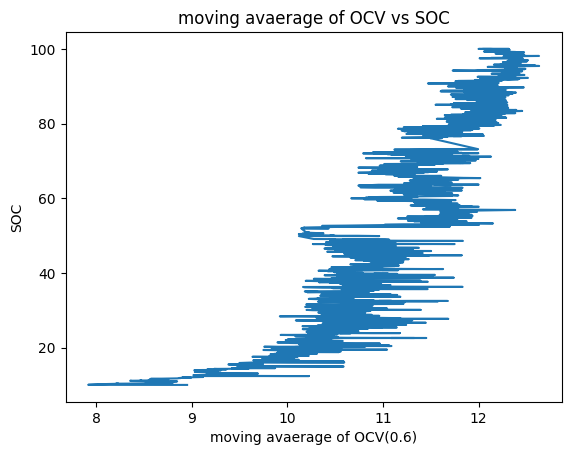

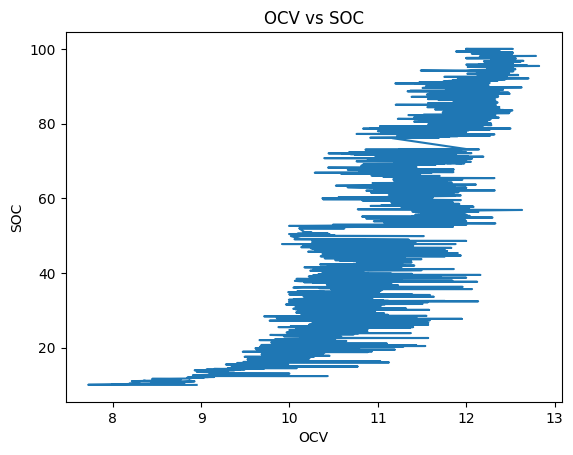

In [ ]:
plt.plot(mavg['.6'],df_ocv['cap'])
plt.title('moving avaerage of OCV vs SOC')
plt.xlabel('moving avaerage of OCV(0.6)')
plt.ylabel('SOC')
plt.show()
plt.plot(mavg['ocv'],df_ocv['cap'])
plt.title('OCV vs SOC')
plt.xlabel('OCV')
plt.ylabel('SOC')
plt.show()

MEAN : 
1      1.621147
2      2.628839
3      4.264050
4      6.918236
5    126.861941
dtype: float64
STANDARD DEVIATION : 
1     0.026838
2     0.086274
3     0.208093
4     0.446346
5    19.507246
dtype: float64
Epoch 1/500
75/75 [==============================] - 1s 3ms/step - loss: 3357.7070 - mean_squared_error: 3357.7070
Epoch 2/500
75/75 [==============================] - 0s 3ms/step - loss: 2775.9329 - mean_squared_error: 2775.9329
Epoch 3/500
75/75 [==============================] - 0s 3ms/step - loss: 2406.6233 - mean_squared_error: 2406.6233
Epoch 4/500
75/75 [==============================] - 0s 3ms/step - loss: 2096.8174 - mean_squared_error: 2096.8174
Epoch 5/500
75/75 [==============================] - 0s 3ms/step - loss: 1819.1984 - mean_squared_error: 1819.1984
Epoch 6/500
75/75 [==============================] - 0s 3ms/step - loss: 1573.9177 - mean_squared_error: 1573.9177
Epoch 7/500
75/75 [==============================] - 0s 3ms/step - loss: 1357.9261 - mean_squar

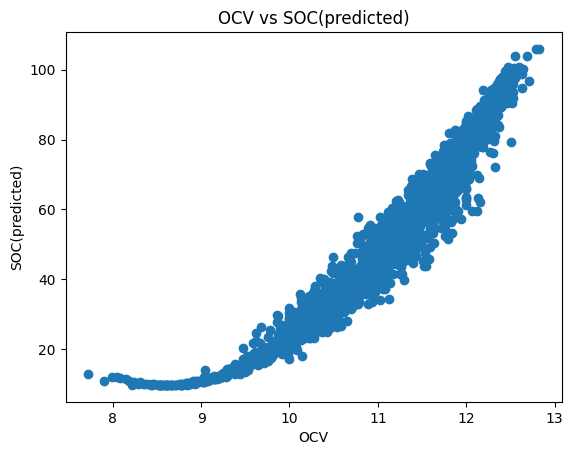

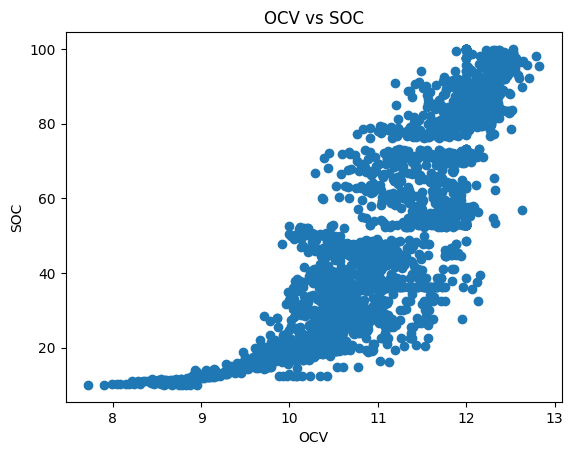

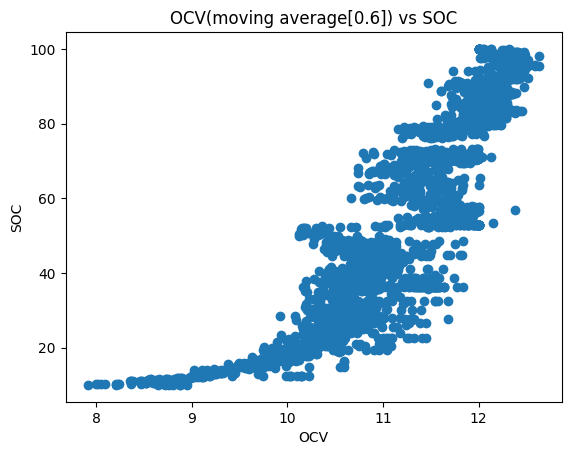

75/75 [==============================] - 0s 2ms/step


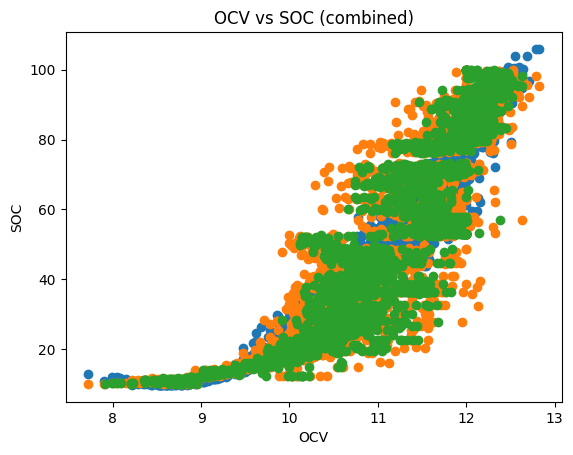

In [ ]:
df_poly = pd.DataFrame()                   #polynomial regression
df_poly['1'] = mavg['.6']**0.2
df_poly['2'] = mavg['.6']**0.4
df_poly['3'] = mavg['.6']**0.6
df_poly['4'] = mavg['.6']**0.8
df_poly['5'] = mavg['.6']**2


df_ocv_1 = df_poly.copy(deep = True)
print("MEAN : ")
print(np.mean(df_ocv_1,axis = 0))  #displaying the mean
print("STANDARD DEVIATION : ")
print(np.std(df_ocv_1,axis = 0))   #displaying the standard deviation
df_ocv_1 = (df_ocv_1 - np.mean(df_ocv_1,axis = 0))/np.std(df_ocv_1,axis = 0)#standardisation of the data
xtrain = df_ocv_1[['1','2','3','4','5']]
ytrain = df_ocv['cap']

m21 = models.Sequential([
    layers.Dense(1,activation = 'linear'),
])
m21.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=5e-2),
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()]) #optimizer = Nadam,metric = "Mean squared error",Initial learning rate =  0.05
history = m21.fit(xtrain,ytrain,epochs = 500,verbose = 1)

plt.scatter(df_ocv.ocv,m21.predict(xtrain))
plt.title('OCV vs SOC(predicted)')
plt.xlabel('OCV')
plt.ylabel('SOC(predicted)')
plt.show()
plt.scatter(df_ocv.ocv,df_ocv.cap)
plt.title('OCV vs SOC')
plt.xlabel('OCV')
plt.ylabel('SOC')
plt.show()
plt.scatter(mavg['.6'],df_ocv.cap)
plt.title('OCV(moving average[0.6]) vs SOC')
plt.xlabel('OCV')
plt.ylabel('SOC')
plt.show()
plt.scatter(df_ocv.ocv,m21.predict(xtrain))
plt.scatter(df_ocv.ocv,df_ocv.cap)
plt.scatter(mavg['.6'],df_ocv.cap)
plt.title('OCV vs SOC (combined)')
plt.xlabel('OCV')
plt.ylabel('SOC')
plt.show()

In [ ]:
m21.layers[0].get_weights()   #weights and biases in the polynomial regression

[array([[-29.766035 ],
        [-17.971025 ],
        [ -6.795968 ],
        [  5.7056656],
        [ 72.815315 ]], dtype=float32),
 array([56.199455], dtype=float32)]

In [ ]:
r2_score(ytrain,m21.predict(xtrain)) #R2 score of the model (out of 1)

75/75 [==============================] - 0s 2ms/step


0.8284034094840288

In [ ]:
m21.layers[0].get_weights()

[array([[-29.766035 ],
        [-17.971025 ],
        [ -6.795968 ],
        [  5.7056656],
        [ 72.815315 ]], dtype=float32),
 array([56.199455], dtype=float32)]

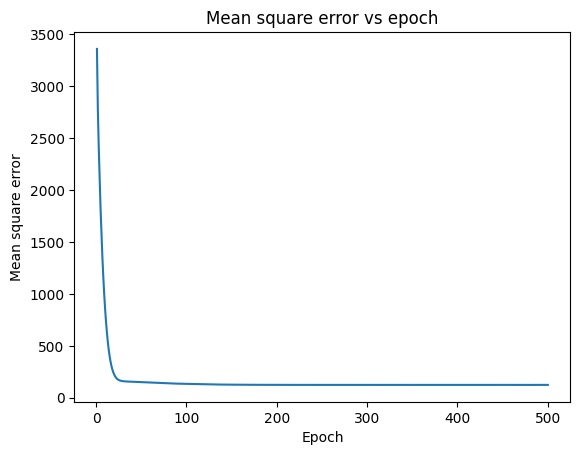

In [ ]:
plt.plot(np.arange(1,501),history.history['mean_squared_error']) #MSE vs epoch graph
plt.title('Mean square error vs epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean square error')
plt.show()